# Ames House Data- Baseline Modelling

In this notebook we will train linear regression model on our train and test sets and make predictions in order to compare our scores with the models that are created after feature engineering process.

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
#Read the cleaned csv's
train_df = pd.read_csv('datasets/train_prototype.csv')
test_df = pd.read_csv('datasets/test_prototype.csv')

In [3]:
#Set the indexes
train_df.set_index('Id', inplace = True)
test_df.set_index('Id', inplace = True)

In [4]:
#Check the shape of data
print("Train data shape:",train_df.shape)
print("Test data shape:",test_df.shape)

Train data shape: (2050, 237)
Test data shape: (879, 229)


In [5]:
pd.options.display.max_columns = None
display(train_df.head())
display(test_df.head())

,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,Mo Sold,Yr Sold,SalePrice,Garage Age,HasPorch,TotalPorchArea,Property_age,Remod Age,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_ClyTile,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_N,Central Air_Y,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Misc Feature_Elev,Misc Feature_Gar2,Misc Feature_None,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,Mo Sold,Yr Sold,Garage Age,HasPorch,TotalPorchArea,Property_age,Remod Age,MS SubClass_120,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Central Air_N,Central Air_Y,Electrical_1,Electrical_2,Electrical_3,Electrical_4,Electrical_None,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Misc Feature_Gar2,Misc Feature_None,Misc Feature_Othr,Misc Feature_Shed,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2658,69.0,9142,3,2,6,8,0.0,2,1,2,3,1

There is a differnce between features in the training data set and the test dataset. Therefore will only consider the features that are present in both sets.

In [6]:
#creating a list of train_df features
train_list = train_df.columns.to_list()

In [7]:
#creating a list of test_df features
test_list = test_df.columns.to_list()

In [8]:
#Select only the common features
common_features=set(test_list).intersection(set(train_list))
common_features

{'1st Flr SF',
 '2nd Flr SF',
 '3Ssn Porch',
 'Alley_Grvl',
 'Alley_None',
 'Alley_Pave',
 'Bedroom AbvGr',
 'Bldg Type_1Fam',
 'Bldg Type_2fmCon',
 'Bldg Type_Duplex',
 'Bldg Type_Twnhs',
 'Bldg Type_TwnhsE',
 'Bsmt Cond',
 'Bsmt Exposure',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Bsmt Qual',
 'Bsmt Unf SF',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Central Air_N',
 'Central Air_Y',
 'Condition 1_Artery',
 'Condition 1_Feedr',
 'Condition 1_Norm',
 'Condition 1_PosA',
 'Condition 1_PosN',
 'Condition 1_RRAe',
 'Condition 1_RRAn',
 'Condition 1_RRNe',
 'Condition 1_RRNn',
 'Condition 2_Feedr',
 'Condition 2_Norm',
 'Condition 2_PosA',
 'Condition 2_PosN',
 'Enclosed Porch',
 'Exter Cond',
 'Exter Qual',
 'Exterior 1st_AsbShng',
 'Exterior 1st_AsphShn',
 'Exterior 1st_BrkComm',
 'Exterior 1st_BrkFace',
 'Exterior 1st_CemntBd',
 'Exterior 1st_HdBoard',
 'Exterior 1st_MetalSd',
 'Exterior 1st_Plywood',
 'Exterior 1st_Stucco',
 'Exterior 1st_VinylSd',
 'Exter

In [9]:
print(train_df.shape)
print(test_df.shape)

(2050, 237)
(879, 229)


In [10]:
#Select predictors
X = train_df[common_features]

In [11]:
#Select target variable
y = train_df['SalePrice']

In [12]:
print(X.shape)
print(y.shape)

(2050, 216)
(2050,)


# Train-test-split training data

In [13]:
# Split the data into training sets and test sets
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.25)

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1537, 216)
(1537,)
(513, 216)
(513,)


In [15]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_val_scaled = ss.transform(X_val)


# Linear Regression

In [16]:
lr =LinearRegression()

In [17]:
lr.fit(X_train,y_train)

LinearRegression()

In [18]:
lr.score(X_train,y_train)

0.9353760850275102

In [19]:
y_train_preds = lr.predict(X_train)

In [20]:
rmse = np.sqrt(mean_squared_error(y_train,y_train_preds))
print('rmse score of training set is ',rmse)

rmse score of training set is  20484.3184167068


In [21]:
r2_score(y_train,y_train_preds)

0.9353760850275102

In [22]:
y_val_preds = lr.predict(X_val)

In [23]:
rmse = np.sqrt(mean_squared_error(y_val, y_val_preds))
print('rmse score of testing set is ', rmse)

rmse score of testing set is  44046.213231805494


In [24]:
r2_score(y_val, y_val_preds)

0.6543662529472827

# Lasso Regression

In [25]:
lasso = LassoCV(n_alphas = 300)

In [26]:
lasso.fit(X_train_scaled, y_train)

LassoCV(n_alphas=300)

In [27]:
lasso_cv_scores = cross_val_score(lasso, X_train_scaled, y_train, cv = 5)
lasso_cv_scores.mean()

0.8242499963481865

In [28]:
lasso_coef = pd.Series(lasso.coef_, index = X.columns).sort_values(ascending = False).to_frame(name = 'Coefficients')

In [29]:
lasso_coef.head(15)

,Coefficients
Gr Liv Area,20804.384277
Overall Qual,15132.276341
Neighborhood_NridgHt,9148.432769
Neighborhood_StoneBr,7451.206315
Exter Qual,6049.643317
Kitchen Qual,5998.710835
Garage Cars,4746.721204
Bldg Type_1Fam,4687.425227
Bsmt Exposure,4467.759090
Mas Vnr Area,4439.492202


In [30]:
lasso_coef.tail(15)

,Coefficients
Garage Type_Basment,-452.602824
Exterior 2nd_Stucco,-501.797909
Exterior 1st_Wd Sdng,-545.276960
Bldg Type_Twnhs,-687.634967
MS SubClass_120,-774.080543
Sale Type_COD,-779.181188
MS SubClass_160,-871.861574
MS Zoning_RM,-1108.305313
Land Contour_Bnk,-1221.171691
Exterior 1st_HdBoard,-1239.225075


In [31]:
coef_cond = ((lasso_coef['Coefficients'] > 2000) | (lasso_coef['Coefficients'] < (-2000)))

In [32]:
significant_coefs = lasso_coef[coef_cond]
significant_coefs

,Coefficients
Gr Liv Area,20804.384277
Overall Qual,15132.276341
Neighborhood_NridgHt,9148.432769
Neighborhood_StoneBr,7451.206315
Exter Qual,6049.643317
Kitchen Qual,5998.710835
Garage Cars,4746.721204
Bldg Type_1Fam,4687.425227
Bsmt Exposure,4467.759090
Mas Vnr Area,4439.492202


In [33]:
significant_features = lasso_coef[coef_cond].index.to_list()
significant_features

['Gr Liv Area',
 'Overall Qual',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'Exter Qual',
 'Kitchen Qual',
 'Garage Cars',
 'Bldg Type_1Fam',
 'Bsmt Exposure',
 'Mas Vnr Area',
 'Neighborhood_NoRidge',
 'Sale Type_New',
 '1st Flr SF',
 'BsmtFin Type 1',
 'Bsmt Full Bath',
 'Screen Porch',
 'Exterior 1st_BrkFace',
 'Fireplace Qu',
 'Misc Feature_Othr',
 'BsmtFin SF 1',
 'TotalPorchArea',
 'Neighborhood_Crawfor',
 'Land Contour_HLS',
 'Lot Area',
 'Misc Feature_Gar2',
 'Functional',
 'Overall Cond',
 'Pool QC',
 'Property_age',
 'Misc Val']

# Model Comparison

We obtained some significant features from the Lasso model. Let's only use that and evaluate the model.

In [34]:
#Filter only the significant features
X_filtered = X[significant_features]

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X_filtered, y, random_state = 42)

In [71]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_val_scaled = ss.transform(X_val)

In [72]:
X_train_scaled.shape

(1537, 30)

In [73]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [74]:
lr_cv_scores = cross_val_score(lr, X_train_scaled, y_train, cv = 5)
lr_cv_scores.mean()

0.8239232255952906

In [75]:
lr_preds = lr.predict(X_val_scaled)
lr.score(X_val_scaled, y_val)

0.9003383119488507

In [76]:
np.sqrt(mean_squared_error(lr_preds, y_val))

24992.638709978084

In [81]:
ridge = RidgeCV(alphas = np.logspace(0, 3, 1000))
ridge.fit(X_train_scaled, y_train)
ridge.alpha_

398.6581073580439

In [82]:
ridge_cv_scores = cross_val_score(ridge, X_train_scaled, y_train, cv = 5)
ridge_cv_scores.mean()

0.8307025372847325

In [83]:
ridge_preds = ridge.predict(X_val_scaled)
ridge.score(X_val_scaled, y_val)

0.8929638986395461

In [84]:
np.sqrt(mean_squared_error(ridge_preds, y_val))

25900.797279576014

In [115]:
lasso = LassoCV(n_alphas = 5000)
lasso.fit(X_train_scaled, y_train)

LassoCV(n_alphas=1000)

In [116]:
lasso_cv_scores = cross_val_score(lasso, X_train_scaled, y_train, cv = 3)
lasso_cv_scores.mean()

0.813325398734917

In [117]:
lasso_preds = lasso.predict(X_val_scaled)
lasso.score(X_val_scaled, y_val)

0.89935470165504

In [118]:
np.sqrt(mean_squared_error(lasso_preds, y_val))

25115.668227109705

In [119]:
residuals = lasso_preds - y_val

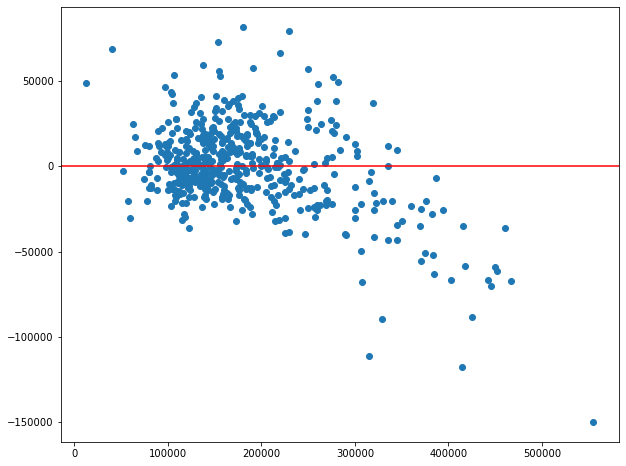

In [120]:
plt.figure(figsize = (10, 8))
plt.scatter(y_val, residuals)
plt.axhline(0, color = 'red')

In [ ]:
Lasoo seemed to perform well than Ridge model. Therefore will use lasso to predict the test dataset

In [121]:
X_test = test_df[significant_features]
X_test.head()

,Gr Liv Area,Overall Qual,Neighborhood_NridgHt,Neighborhood_StoneBr,Exter Qual,Kitchen Qual,Garage Cars,Bldg Type_1Fam,Bsmt Exposure,Mas Vnr Area,Neighborhood_NoRidge,Sale Type_New,1st Flr SF,BsmtFin Type 1,Bsmt Full Bath,Screen Porch,Exterior 1st_BrkFace,Fireplace Qu,Misc Feature_Othr,BsmtFin SF 1,TotalPorchArea,Neighborhood_Crawfor,Land Contour_HLS,Lot Area,Misc Feature_Gar2,Functional,Overall Cond,Pool QC,Property_age,Misc Val
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2658,1928,6,0,0,2,1,1,0,1,0.0,0,0,908,1,0,0,0,0,0,0,172,0,0,9142,0,7,8,0,111,0
2718,1967,5,0,0,2,2,2,0,1,0.0,0,0,1967,1,0,0,0,0,0,0,170,0,0,9662,0,7,4,0,44,0
2414,1496,7,0,0,3,3,2,1,3,0.0,0,1,664,6,1,0,0,4,0,554,124,0,0,17104,0,7,5,0,15,0
1989,968,5,0,0,3,2,2,1,1,0.0,0,0,968,1,0,0,0,0,0,0,184,0,0,8520,0,7,6,0,98,0
625,1394,6,0,0,2,2,2,1,1,247.0,0,0,1394,4,1,185,0,4,0,609,261,0,0,9500,0,7,5,0,58,0


In [122]:
X_test_scaled = ss.fit_transform(X_test)
X_test_scaled.shape

(879, 30)

In [129]:
predictions = lr.predict(X_test_scaled)
predictions

array([122220.36565794, 147506.6895083 , 243791.70533155, 117942.7072936 ,
       185805.5452704 ,  85476.7723131 , 102107.88350863, 159169.59537281,
       173147.97287408, 163615.52151361, 153936.05053377, 120207.30211895,
       143616.26408775, 248885.48815197, 153062.59167188, 132527.7164479 ,
       133733.27969614, 116900.32958715, 202417.89369028, 200243.38542387,
       159213.88001122, 130986.55634675, 179965.35333169, 170134.03227455,
       185510.98688653, 125145.03828643, 119705.38450829, 136461.53156498,
       178807.378831  ,  12505.12463163, 100955.21433734, 102755.08371453,
       237179.87963565, 157108.48716924, 227863.37809999, 193754.80118722,
       112408.98649248,  79211.55257166, 150227.34736213, 188547.02692485,
       180209.75542625, 206932.91425088, 151248.70552358, 144833.73427229,
       217078.93572175,  89960.75124845, 227169.83359045, 125823.07646105,
       133107.88076605, 127921.39574506, 110524.88359037, 210446.78965139,
       238302.63441178, 1

In [130]:
X_test['SalePrice'] = predictions
X_test.head()

,Gr Liv Area,Overall Qual,Neighborhood_NridgHt,Neighborhood_StoneBr,Exter Qual,Kitchen Qual,Garage Cars,Bldg Type_1Fam,Bsmt Exposure,Mas Vnr Area,Neighborhood_NoRidge,Sale Type_New,1st Flr SF,BsmtFin Type 1,Bsmt Full Bath,Screen Porch,Exterior 1st_BrkFace,Fireplace Qu,Misc Feature_Othr,BsmtFin SF 1,TotalPorchArea,Neighborhood_Crawfor,Land Contour_HLS,Lot Area,Misc Feature_Gar2,Functional,Overall Cond,Pool QC,Property_age,Misc Val,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2658,1928,6,0,0,2,1,1,0,1,0.0,0,0,908,1,0,0,0,0,0,0,172,0,0,9142,0,7,8,0,111,0,122220.365658
2718,1967,5,0,0,2,2,2,0,1,0.0,0,0,1967,1,0,0,0,0,0,0,170,0,0,9662,0,7,4,0,44,0,147506.689508
2414,1496,7,0,0,3,3,2,1,3,0.0,0,1,664,6,1,0,0,4,0,554,124,0,0,17104,0,7,5,0,15,0,243791.705332
1989,968,5,0,0,3,2,2,1,1,0.0,0,0,968,1,0,0,0,0,0,0,184,0,0,8520,0,7,6,0,98,0,117942.707294
625,1394,6,0,0,2,2,2,1,1,247.0,0,0,1394,4,1,185,0,4,0,609,261,0,0,9500,0,7,5,0,58,0,185805.545270


In [131]:
submission = X_test[['SalePrice']]
submission.head()

,SalePrice
Id,
2658,122220.365658
2718,147506.689508
2414,243791.705332
1989,117942.707294
625,185805.545270


In [132]:
submission.sort_index(inplace = True)
submission.head()

,SalePrice
Id,
2,122756.270160
4,267689.107332
6,194339.743182
7,263683.694973
17,227764.266215


In [133]:
submission.shape

(879, 1)

In [134]:
submission.to_csv('datasets/submission(Baseline).csv')